In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Questions Of Interest

1. How does time-smoothening (e.g. decay-convolution) affect periodigram
2. How does noise affect periodigram
3. How does ensemble-averaging affect periodigram
2. How does time-sub-sampling affect periodigram
4. How much info can be recovered about original function after application of all of the above.

Conclusions:
1. Time-smoothening increases magnitude of very low frequency signal, and very slightly lowers the value of fast frequencies. It does not appear to destroy any information alone.



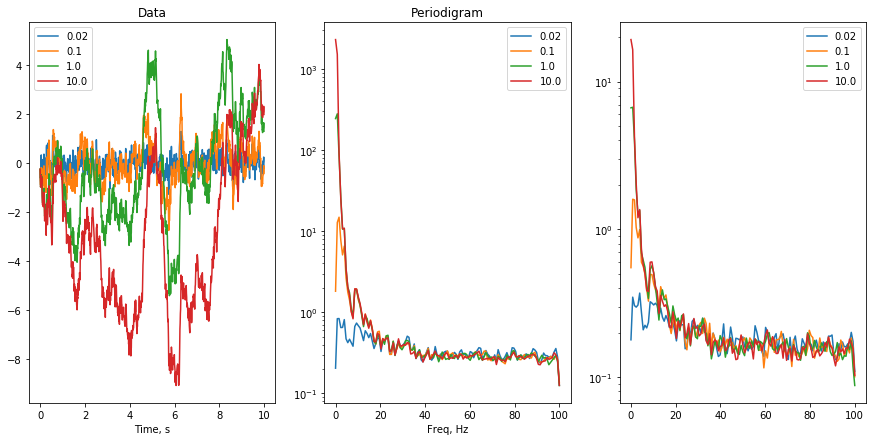

In [52]:
# Approximate convolution of dataset with lag
def approxDelayConv(data, TAU, DT):
    if TAU == 0:
        return data
    else:    
        rez = np.zeros(len(data)+1)
        for i in range(1, len(data)+1):
            rez[i] = data[i-1] + rez[i-1] * (1 - DT / TAU)

        return rez[1:]

TIME = 10 # Seconds
DT = 0.01 # Seconds
FMAX = 1/DT
NDATA = int(TIME*FMAX)

N_SAMPLE = 100
NOISE_LEVEL = 0.5
t = np.linspace(0, TIME-DT, NDATA)

# Generate noise that has similar magnitude in all frequencies
#y = np.random.normal(0, 1, NDATA)
y = 1j*np.random.normal(0, 1, NDATA)
y += np.random.normal(0, 1, NDATA)
yf = np.real(np.fft.ifft(y))
# Also normalize it
yf /= np.max(yf)


fig, ax = plt.subplots(ncols=3, figsize=(15, 7))
tauLst = DT*np.array([2, 10, 100, 1000])

for tau in tauLst:
    # Decay convolution
    yc = approxDelayConv(yf, tau, DT)
    
    # Power spectral density
    psdSamples = [plt.mlab.psd(yc + np.random.normal(0, NOISE_LEVEL, NDATA)) for i in range(N_SAMPLE)]
    f = psdSamples[0][1]
    pxxSamples = [sample[0] for sample in psdSamples]
    
    pxx_mean = np.mean(pxxSamples, axis=0)
    pxx_std = np.std(pxxSamples, axis=0)
    
    # TODO: Apply noise multiple times, compute average and variance
    
    ax[0].plot(t, yc, label=str(tau))
    ax[1].semilogy(f*FMAX, pxx_mean, label=str(tau))
    ax[2].semilogy(f*FMAX, pxx_std, label=str(tau))

ax[0].set_title("Data")
ax[1].set_title("Periodigram")
ax[0].set_xlabel("Time, s")
ax[1].set_xlabel("Freq, Hz")
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()


In [42]:
# TODO: Ensemble-average, subsampling

[0.        0.0078125 0.015625  0.0234375 0.03125   0.0390625 0.046875
 0.0546875 0.0625    0.0703125 0.078125  0.0859375 0.09375   0.1015625
 0.109375  0.1171875 0.125     0.1328125 0.140625  0.1484375 0.15625
 0.1640625 0.171875  0.1796875 0.1875    0.1953125 0.203125  0.2109375
 0.21875   0.2265625 0.234375  0.2421875 0.25      0.2578125 0.265625
 0.2734375 0.28125   0.2890625 0.296875  0.3046875 0.3125    0.3203125
 0.328125  0.3359375 0.34375   0.3515625 0.359375  0.3671875 0.375
 0.3828125 0.390625  0.3984375 0.40625   0.4140625 0.421875  0.4296875
 0.4375    0.4453125 0.453125  0.4609375 0.46875   0.4765625 0.484375
 0.4921875 0.5       0.5078125 0.515625  0.5234375 0.53125   0.5390625
 0.546875  0.5546875 0.5625    0.5703125 0.578125  0.5859375 0.59375
 0.6015625 0.609375  0.6171875 0.625     0.6328125 0.640625  0.6484375
 0.65625   0.6640625 0.671875  0.6796875 0.6875    0.6953125 0.703125
 0.7109375 0.71875   0.7265625 0.734375  0.7421875 0.75      0.7578125
 0.765625  0.77343